In [ ]:
# Thomas Scott
# Unit 12 Homework
# Due date: July 11th, 2021

# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Coding\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from dotenv import load_dotenv

In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [5]:
from newsapi import NewsApiClient

In [6]:
# Create a newsapi client
news_api = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
bitcoin_articles = news_api.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")

In [10]:
print(f"Total number of Bitcoin articles: {bitcoin_articles['totalResults']}")

Total number of Bitcoin articles: 8375


In [11]:
# Fetch the Ethereum news articles
ether_articles = news_api.get_everything(q="etherium", language="en", page_size=100, sort_by="relevancy")

In [14]:
print(f"Total number of Etherium articles: {ether_articles['totalResults']}")

Total number of Etherium articles: 24


In [24]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        }
    )
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

columns = ["compound", "negative", "neutral", "positive", "text", "date"]

btc_column_df = btc_df[columns]

bitcoin_sentiment_df = btc_article_df.drop(columns=['date'])

# Display first 5 values in the datasframe
bitcoin_sentiment_df.head()

,compound,negative,neutral,positive,text
0,0.6908,0.000,0.831,0.169,"It's all about clean energy, it seems. \r\nElo..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...
3,0.1280,0.000,0.957,0.043,"SAN SALVADOR, June 16 (Reuters) - El Salvador ..."
4,0.2023,0.057,0.838,0.105,"LONDON, June 23 (Reuters) - El Salvador is det..."


In [27]:
# Create the Ethereum sentiment scores DataFrame

eth_sentiments = []

for article in ether_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        }
    )
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

columns = ["compound", "negative", "neutral", "positive", "text", "date"]

eth_column_df = eth_df[columns]

etherium_sentiment_df = eth_column_df.drop(columns=['date'])

# Display first 5 values in the datasframe
etherium_sentiment_df.head()

,compound,negative,neutral,positive,text
0,0.2846,0.160,0.677,0.163,PC gamers have been suffering under the weight...
1,0.2500,0.000,0.939,0.061,Twitter was abuzz with memes and jokes after t...
2,0.1280,0.000,0.960,0.040,"The story so far: On June 9, El Salvador becam..."
3,0.2008,0.062,0.855,0.083,"As an underground digital artist, Itzel Yard n..."
4,0.5256,0.000,0.904,0.096,Company Offers Inclusionary Banking For The Un...


In [26]:
# Describe the Bitcoin Sentiment

bitcoin_sentiment_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.018765,0.031400,0.928830,0.039760
std,0.347696,0.051491,0.070638,0.056185
min,-0.812600,0.000000,0.705000,0.000000
25%,-0.121500,0.000000,0.873000,0.000000
50%,0.000000,0.000000,0.930500,0.000000
75%,0.318200,0.060000,1.000000,0.076000
max,0.750600,0.249000,1.000000,0.218000


In [28]:
# Describe the Ethereum Sentiment
etherium_sentiment_df.describe()

,compound,negative,neutral,positive
count,24.000000,24.000000,24.000000,24.000000
mean,0.072967,0.044792,0.890250,0.064958
std,0.484653,0.059155,0.091401,0.078986
min,-0.726900,0.000000,0.670000,0.000000
25%,-0.355475,0.000000,0.854000,0.000000
50%,0.064000,0.000000,0.891000,0.050500
75%,0.402300,0.088250,0.944250,0.102500
max,0.831600,0.160000,1.000000,0.274000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium has the highest mean positive score of the two cryptocurrencies

Q: Which coin had the highest compound score?

A: Ether was again the highest here. Judging by the mean, standard deviation and max, it is higher than bitcoin.

Q. Which coin had the highest positive score?

A: Ether again has the highest positive score. It appears that although bitcoin has a larger body of literature, it's overall sentiment is weighed down by critical coverage.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [29]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [106]:
# Instantiate the lemmatizer
lemmatizer_instance = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
stopword_expanded = {'did','he','she','us','reuters','char','chars','ha'}


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
lemmatizer = WordNetLemmatizer()

In [107]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    '''

    
    # Lemmatize words into root words
    
    lematize = [lemmatizer.lemmatize(word) for word in tokenized_words]
    
    tokens = [word.lower() for word in lematize if word.lower() not in tokenized_words.union(stopword_expanded)]
    
    return tokens
    '''
    # Create a tokenized list of the words

    stopword = set(stopwords.words('english'))
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text

    re_clean = regex.sub('', text)
    
    # Remove the stop words
    
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in stopword.union(stopword_expanded)]
    
    return tokens

In [108]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df['text'].apply(tokenizer)
bitcoin_sentiment_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.6908,0.000,0.831,0.169,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, seemselon, musk, tesla, caused..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, reach..."
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.1280,0.000,0.957,0.043,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...","[san, salvador, june, el, salvador, replace, d..."
4,0.2023,0.057,0.838,0.105,"LONDON, June 23 (Reuters) - El Salvador is det...","[london, june, el, salvador, determined, push,..."


In [109]:
# Create a new tokens column for Ethereum
etherium_sentiment_df['tokens'] = etherium_sentiment_df['text'].apply(tokenizer)
etherium_sentiment_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.2846,0.160,0.677,0.163,PC gamers have been suffering under the weight...,"[pc, gamers, suffering, weight, gpu, shortage,..."
1,0.2500,0.000,0.939,0.061,Twitter was abuzz with memes and jokes after t...,"[twitter, wa, abuzz, meme, joke, cryptocurrenc..."
2,0.1280,0.000,0.960,0.040,"The story so far: On June 9, El Salvador becam...","[story, far, june, el, salvador, became, first..."
3,0.2008,0.062,0.855,0.083,"As an underground digital artist, Itzel Yard n...","[underground, digital, artist, itzel, yard, ne..."
4,0.5256,0.000,0.904,0.096,Company Offers Inclusionary Banking For The Un...,"[company, offers, inclusionary, banking, under..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [71]:
from collections import Counter
from nltk import ngrams

In [110]:
# Generate the Bitcoin N-grams where N=2
btc_text = ' '.join(bitcoin_sentiment_df.text)

btc_tokenizer = tokenizer(btc_text)

btc_ngrams = Counter(ngrams(btc_tokenizer, n=2))

print(dict(btc_ngrams.most_common(10)))

{('el', 'salvador'): 13, ('taken', 'june'): 13, ('world', 'biggest'): 12, ('previous', 'closebitcoin'): 11, ('closebitcoin', 'world'): 11, ('biggest', 'bestknown'): 11, ('june', 'reutersedgar'): 11, ('illustration', 'taken'): 10, ('bestknown', 'cryptocurrency'): 10, ('bitcoin', 'seen'): 9}


In [111]:
# Generate the Ethereum N-grams where N=2
eth_text = ' '.join(etherium_sentiment_df.text)

eth_tokenizer = tokenizer(eth_text)

eth_ngrams = Counter(ngrams(eth_tokenizer, n=2))

print(dict(eth_ngrams.most_common(10)))

{('june', 'prnewswire'): 3, ('inclusionary', 'banking'): 2, ('vegas', 'june'): 2, ('prnewswire', 'rockitcoin'): 2, ('rockitcoin', 'trusted'): 2, ('trusted', 'name'): 2, ('name', 'bitcoin'): 2, ('bitcoin', 'atm'): 2, ('barry', 'moore'): 2, ('esports', 'team'): 2}


In [80]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [112]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(btc_tokenizer)
top_10_btc

[('bitcoin', 89),
 ('june', 46),
 ('cryptocurrency', 30),
 ('el', 24),
 ('monday', 22),
 ('world', 21),
 ('salvador', 19),
 ('seen', 18),
 ('illustration', 18),
 ('taken', 16)]

In [113]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(eth_tokenizer)
top_10_eth

[('cryptocurrency', 7),
 ('year', 5),
 ('june', 5),
 ('first', 5),
 ('digital', 5),
 ('week', 5),
 ('artist', 4),
 ('whether', 3),
 ('wa', 3),
 ('bitcoin', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

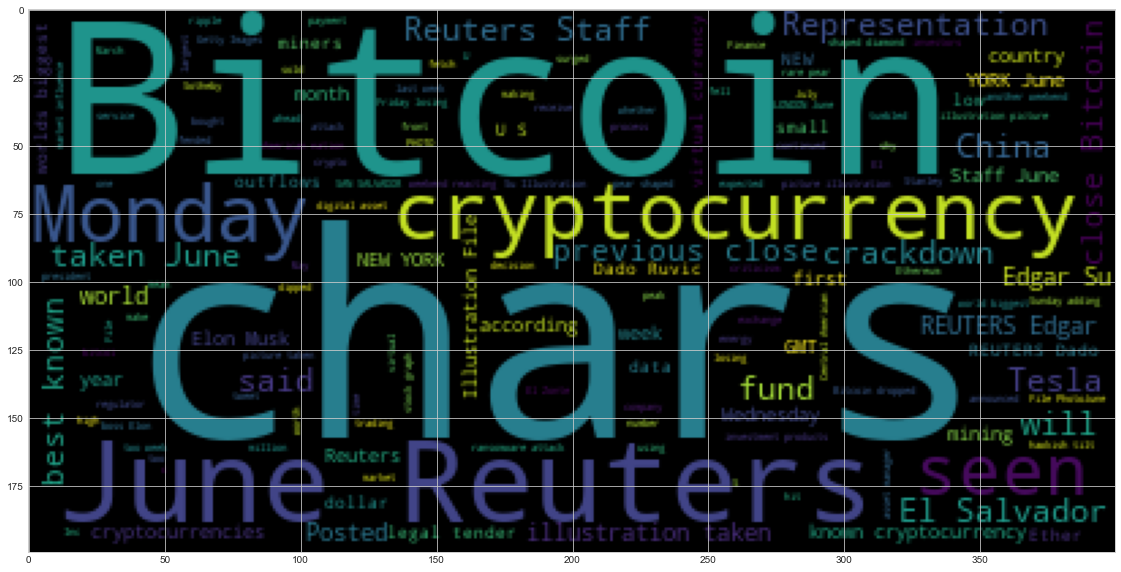

In [114]:
# Generate the Bitcoin word cloud

btc_wordcloud = WordCloud().generate(btc_text)

plt.imshow(btc_wordcloud)

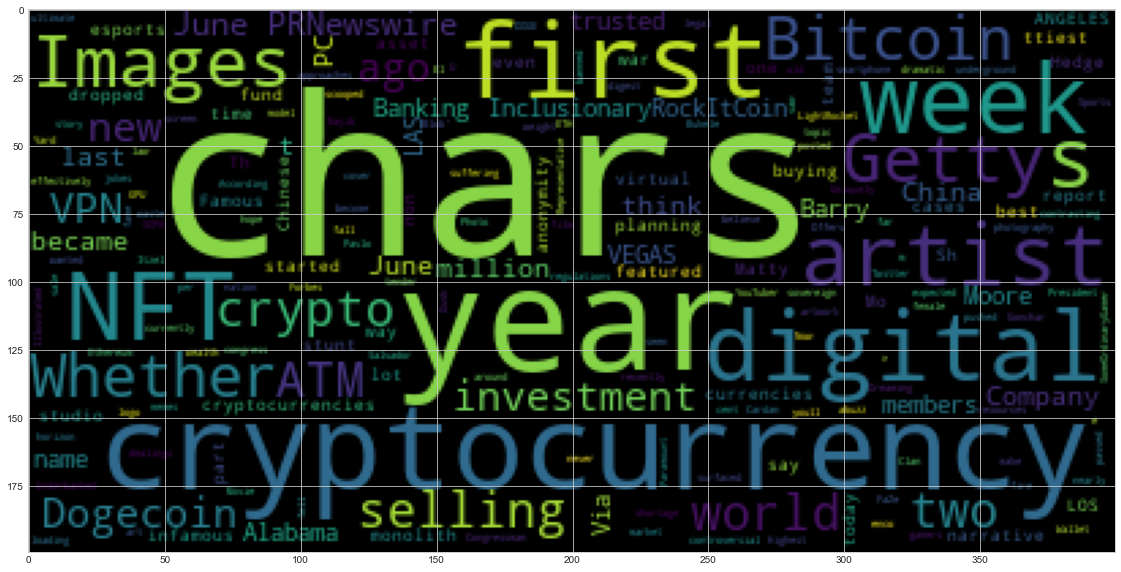

In [115]:
# Generate the Ethereum word cloud
eth_wordcloud = WordCloud().generate(eth_text)

plt.imshow(eth_wordcloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [116]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [117]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [118]:
# Concatenate all of the Bitcoin text together
bitcoin_NER_text = ' '.join(bitcoin_sentiment_df.text)

bitcoin_NER_text

'It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars] Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] SAN SALVADOR, June 16 (Reuters) - El Salvador will not replace the U.S. dollar with bitcoin as the legal tender, Finance Minister Alejandro Zelaya said on Wednesday, as the Central American nation so… [+1266 chars] LONDON, June 23 (Reuters) - El Salvador is determined to push ahead with making bitcoin legal tender, a process that will bri

In [120]:
# Run the NER processor on all of the text
bitcoin_NER_processor = nlp(bitcoin_NER_text)

# Add a title to the document
bitcoin_NER_processor.user_data["title"] = "Bitcoin NER"

In [121]:
# Render the visualization
displacy.render(bitcoin_NER_processor, style='ent')

In [123]:
# List all Entities

# Use iteration

for ent in bitcoin_NER_processor.ents:
    
    print(ent.text + ' ' + ent.label_)
    

Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
Alex Castro PERSON
Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
Bitcoin PERSON
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
the Central American LOC
Monday DATE
morning TIME
earlier this year DATE
Dogecoin GPE
Reuters ORG
June 13 DATE
Reuters ORG
9.8% PERCENT
39,035.47 MONEY
Sunday DATE
3,492.71 MONEY
Bitcoin PERSON
Bitcoin PERSON
March 15, 2021 DATE
Dado Ruvic PERSON
June 30 DATE
Reuters ORG
June 21 DATE
Reuters ORG
Monday DATE
China GPE
Sichuan GPE
Bitcoin PERSON
as low as $32,288 MONEY
first ORDINAL
Reuters ORG
Bitcoin ORG
June 7, 2021 DATE
Edgar Su/Illustration PERSON
R

---

### Ethereum NER

In [124]:
# Concatenate all of the Ethereum text together

etherium_NER_text = ' '.join(etherium_sentiment_df.text)

etherium_NER_text

'PC gamers have been suffering under the weight of the GPU shortage for the last year, but there’s some hope on the horizon. China has effectively banned cryptocurrency, and whether or not you think t… [+2195 chars] Twitter was abuzz with memes and jokes after the cryptocurrency market saw a dramatic fall over regulations in cryptocurrency dealings in China.\r\nAccording to\xa0Forbes, Bitcoin fell around 9 per cent e… [+2913 chars] The story so far: On June 9, El Salvador became the first sovereign nation to make a cryptocurrency legal tender. The law pushed by its 39-year-old President, Nayib Bukele, passed with 62 out of 84 v… [+4958 chars] As an underground digital artist, Itzel Yard never wanted nor expected fame and wealth. When she became the highest-selling female NFT artist with the $2 million sale of her artwork Dreaming at Dusk,… [+4700 chars] Company Offers Inclusionary Banking For The Underbanked Via Crypto ATMs and Now Uniquely, Its Digital Wallet\r\nLAS VEGAS, June 24, 20

In [125]:
# Run the NER processor on all of the text
etherium_NER_processor = nlp(etherium_NER_text)

# Add a title to the document
etherium_NER_processor.user_data["title"] = "Etherium NER"

In [126]:
# Render the visualization
displacy.render(etherium_NER_processor, style='ent')

In [127]:
# List all Entities
# Use iteration

for ent in etherium_NER_processor.ents:
    
    print(ent.text + ' ' + ent.label_)
    

GPU ORG
the last year DATE
China GPE
China GPE
Bitcoin PERSON
around 9 per cent MONEY
June 9 DATE
El Salvador GPE
first ORDINAL
39-year-old DATE
Nayib Bukele PERSON
62 CARDINAL
84 CARDINAL
Itzel Yard PERSON
NFT ORG
$2 million MONEY
Dreaming at Dusk WORK_OF_ART
Now Uniquely GPE
Digital ORG
LAS VEGAS GPE
June 24, 2021 DATE
Bitcoin ATM GPE
two CARDINAL
U.S. GPE
this week DATE
Alabama Congressman PERSON
Barry Moore PERSON
Ethereum (ETH) ORG
Cardan PERSON
Pavlo Gonchar PERSON
Getty Images ORG
Barry Moore PERSON
FaZe Clan PERSON
first ORDINAL
Sports Illustrated ORG
YouTuber GPE
The Blob' WORK_OF_ART
1958 DATE
Paramount/Getty Images ORG
Getty Images PERSON
a decade ago DATE
LOS ANGELES GPE
June 29, 2021 DATE
Matty Mo PERSON
2020 DATE
The Most Sh*ttiest NFT WORK_OF_ART
first ORDINAL
Delve PERSON
six weeks DATE
Cryptocurrencies ORG
today DATE
Al Pereira / Getty PERSON
Tribe Called Quest ORG
Hip-Hop PERSON
NFT’s ORG
Ali Shaheed Muha PERSON
two weeks DATE
the one year anniversary DATE
one year ag

---